In [1]:
# import packages
import os
import pandas as pd
#import pandas_profiling
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import xgboost
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import (GradientBoostingRegressor, GradientBoostingClassifier)
pd.set_option('max.columns',100)
pd.set_option('max.rows',500)


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

get_ipython().run_line_magic('matplotlib', 'inline')
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('talk')
from sklearn.impute import KNNImputer

import missingno as msno
from datetime import datetime

In [6]:
#reading data 

os.chdir("D:\\DSP2\\Git\\monitoring-athletes-performance\\main")
data_path = '{}/data'.format(os.path.pardir)
athlete_csv_file = '{}/{}'.format(data_path, 'Eduardo Oliveira (Intermediate).csv')


In [7]:
#reading eddy data and print its shape and data type
eddy=pd.read_csv(athlete_csv_file)
print('eddy data shape: ', eddy.shape)#shape 
print(eddy.dtypes)#data type

eddy data shape:  (1140, 43)
Activity Type                object
Date                         object
Favorite                       bool
Title                        object
Distance                     object
Calories                     object
Time                         object
Avg HR                       object
Max HR                       object
Aerobic TE                   object
Avg Run Cadence              object
Max Run Cadence              object
Avg Speed                    object
Max Speed                    object
Elev Gain                    object
Elev Loss                    object
Avg Stride Length           float64
Avg Vertical Ratio          float64
Avg Vertical Oscillation    float64
Avg Ground Contact Time      object
Avg GCT Balance              object
Avg Bike Cadence             object
Max Bike Cadence             object
Normalized Power® (NP®)      object
L/R Balance                  object
Training Stress Score®      float64
Max Avg Power (20 min)       object

In [8]:

eddy.drop(['Favorite','Aerobic TE','Avg Run Cadence','Max Run Cadence','Avg Stride Length','Avg Vertical Ratio','Avg Vertical Oscillation','Avg Ground Contact Time'
,'Avg GCT Balance','L/R Balance','Grit','Flow','Total Reps','Total Sets','Bottom Time','Min Temp','Surface Interval','Decompression','Best Lap Time','Max Temp'], axis =1, inplace=True)
    

In [9]:
print(eddy)

            Activity Type                 Date  \
0         Virtual Cycling  2020-04-06 18:15:01   
1          Indoor Cycling  2020-04-05 17:00:02   
2         Virtual Cycling  2020-04-05 16:00:01   
3         Virtual Cycling  2020-04-04 06:59:59   
4         Virtual Cycling  2020-04-03 18:00:28   
...                   ...                  ...   
1135       Indoor Cycling  2017-03-16 18:44:33   
1136              Running  2017-03-16 18:30:17   
1137       Indoor Cycling  2017-03-16 18:08:25   
1138           Multisport  2017-03-12 07:52:43   
1139  Open Water Swimming  2017-03-11 12:56:24   

                                             Title Distance Calories  \
0              Zwift - TBR Knights of Suburbia (D)    27.56      479   
1                                   Indoor Cycling    14.08      398   
2                             Zwift - AHDR BBQ (D)    23.22      431   
3     Zwift - Scott D'Aucourt's Meetup - Tick Tock    50.56      838   
4         Zwift -  Haute Route Watopia 

In [10]:
eddy.columns
  

Index(['Activity Type', 'Date', 'Title', 'Distance', 'Calories', 'Time',
       'Avg HR', 'Max HR', 'Avg Speed', 'Max Speed', 'Elev Gain', 'Elev Loss',
       'Avg Bike Cadence', 'Max Bike Cadence', 'Normalized Power® (NP®)',
       'Training Stress Score®', 'Max Avg Power (20 min)', 'Avg Power',
       'Max Power', 'Total Strokes', 'Avg. Swolf', 'Avg Stroke Rate',
       'Number of Laps'],
      dtype='object')

In [11]:
eddy.columns= eddy.columns.str.replace(',', '')
print(eddy.columns)

Index(['Activity Type', 'Date', 'Title', 'Distance', 'Calories', 'Time',
       'Avg HR', 'Max HR', 'Avg Speed', 'Max Speed', 'Elev Gain', 'Elev Loss',
       'Avg Bike Cadence', 'Max Bike Cadence', 'Normalized Power® (NP®)',
       'Training Stress Score®', 'Max Avg Power (20 min)', 'Avg Power',
       'Max Power', 'Total Strokes', 'Avg. Swolf', 'Avg Stroke Rate',
       'Number of Laps'],
      dtype='object')


In [12]:
eddy.head(43)

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Speed,Max Speed,Elev Gain,Elev Loss,Avg Bike Cadence,Max Bike Cadence,Normalized Power® (NP®),Training Stress Score®,Max Avg Power (20 min),Avg Power,Max Power,Total Strokes,Avg. Swolf,Avg Stroke Rate,Number of Laps
0,Virtual Cycling,2020-04-06 18:15:01,Zwift - TBR Knights of Suburbia (D),27.56,479,00:45:14,--,--,36.6,56.5,80,--,87,111,191,0.0,197,181,445,--,--,--,1
1,Indoor Cycling,2020-04-05 17:00:02,Indoor Cycling,14.08,398,00:36:17,--,--,23.3,30.2,--,--,89,127,195,43.2,195,183,623,3179,--,--,2
2,Virtual Cycling,2020-04-05 16:00:01,Zwift - AHDR BBQ (D),23.22,431,00:40:38,--,--,34.3,54.1,89,--,85,111,192,0.0,198,180,620,--,--,--,1
3,Virtual Cycling,2020-04-04 06:59:59,Zwift - Scott D'Aucourt's Meetup - Tick Tock,50.56,838,01:36:19,--,--,31.5,59.0,158,--,84,125,167,0.0,166,152,737,--,--,--,1
4,Virtual Cycling,2020-04-03 18:00:28,Zwift - Haute Route Watopia Stage 1 (E),10.32,218,00:19:28,--,--,31.8,68.1,92,--,92,116,189,0.0,--,183,647,--,--,--,1
5,Virtual Cycling,2020-04-03 17:42:41,Zwift - Richmond,7.77,129,00:14:24,--,--,32.4,52.3,24,--,84,123,179,0.0,--,157,699,--,--,--,1
6,Virtual Cycling,2020-04-03 17:08:26,Zwift - Stage 1 Race (D) - Tour of Watopia 2020,8.12,191,00:12:51,--,--,37.9,51.9,37,--,87,105,234,0.0,--,228,580,--,--,--,1
7,Virtual Cycling,2020-04-02 17:05:54,Zwift - SZR Sunrise Ride (C),16.77,315,00:27:13,--,--,37.0,63.1,136,--,84,98,205,0.0,210,200,383,--,--,--,1
8,Virtual Cycling,2020-04-01 18:10:01,Zwift - TBR Crikey Down Under - Galahs vs Womb...,30.96,527,00:50:13,152,177,37.0,56.3,102,--,80,100,188,0.0,189,178,420,--,--,--,1
9,Running,2020-03-31 18:03:03,Melbourne Running,8.02,468,00:42:04,146,167,5:15,4:39,40,36,--,--,--,0.0,--,--,--,--,--,--,9


In [13]:
eddy = eddy.replace({ "--": np.nan, "...": np.nan })#missing values replaced by nan
eddy

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Speed,Max Speed,Elev Gain,Elev Loss,Avg Bike Cadence,Max Bike Cadence,Normalized Power® (NP®),Training Stress Score®,Max Avg Power (20 min),Avg Power,Max Power,Total Strokes,Avg. Swolf,Avg Stroke Rate,Number of Laps
0,Virtual Cycling,2020-04-06 18:15:01,Zwift - TBR Knights of Suburbia (D),27.56,479,00:45:14,NaN,NaN,36.6,56.5,80,NaN,87,111,191,0.0,197,181,445,NaN,NaN,NaN,1
1,Indoor Cycling,2020-04-05 17:00:02,Indoor Cycling,14.08,398,00:36:17,NaN,NaN,23.3,30.2,NaN,NaN,89,127,195,43.2,195,183,623,3179,NaN,NaN,2
2,Virtual Cycling,2020-04-05 16:00:01,Zwift - AHDR BBQ (D),23.22,431,00:40:38,NaN,NaN,34.3,54.1,89,NaN,85,111,192,0.0,198,180,620,NaN,NaN,NaN,1
3,Virtual Cycling,2020-04-04 06:59:59,Zwift - Scott D'Aucourt's Meetup - Tick Tock,50.56,838,01:36:19,NaN,NaN,31.5,59.0,158,NaN,84,125,167,0.0,166,152,737,NaN,NaN,NaN,1
4,Virtual Cycling,2020-04-03 18:00:28,Zwift - Haute Route Watopia Stage 1 (E),10.32,218,00:19:28,NaN,NaN,31.8,68.1,92,NaN,92,116,189,0.0,NaN,183,647,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,Indoor Cycling,2017-03-16 18:44:33,Indoor Cycling,3.83,118,00:09:19.0,144,153,24.6,31.4,2,NaN,80,92,NaN,0.0,NaN,NaN,NaN,750,NaN,NaN,NaN
1136,Running,2017-03-16 18:30:17,Elwood Running,1.84,153,00:10:27,168,183,5:40,4:04,1,3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1137,Indoor Cycling,2017-03-16 18:08:25,Indoor Cycling,8.13,198,00:21:31,125,147,22.7,35.0,2,2,88,115,NaN,0.0,NaN,NaN,NaN,1867,NaN,NaN,NaN
1138,Multisport,2017-03-12 07:52:43,Portarlington Multi-Sport,35.83,"1,725",02:03:46,NaN,186,17.4,NaN,180,170,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#capitalization
eddy['Activity Type'] = eddy['Activity Type'].str.lower()
eddy['Title'] = eddy['Title'].str.lower()
print(eddy)

            Activity Type                 Date  \
0         virtual cycling  2020-04-06 18:15:01   
1          indoor cycling  2020-04-05 17:00:02   
2         virtual cycling  2020-04-05 16:00:01   
3         virtual cycling  2020-04-04 06:59:59   
4         virtual cycling  2020-04-03 18:00:28   
...                   ...                  ...   
1135       indoor cycling  2017-03-16 18:44:33   
1136              running  2017-03-16 18:30:17   
1137       indoor cycling  2017-03-16 18:08:25   
1138           multisport  2017-03-12 07:52:43   
1139  open water swimming  2017-03-11 12:56:24   

                                             Title Distance Calories  \
0              zwift - tbr knights of suburbia (d)    27.56      479   
1                                   indoor cycling    14.08      398   
2                             zwift - ahdr bbq (d)    23.22      431   
3     zwift - scott d'aucourt's meetup - tick tock    50.56      838   
4         zwift -  haute route watopia 

In [15]:
#formats
eddy['Elev Gain'] = eddy['Elev Gain'].str.replace(',', '')
eddy['Elev Gain'] = eddy['Elev Gain'].astype(float)


In [16]:
eddy["Elev Gain"] = pd.to_numeric(eddy["Elev Gain"])
print(eddy.dtypes)

Activity Type               object
Date                        object
Title                       object
Distance                    object
Calories                    object
Time                        object
Avg HR                      object
Max HR                      object
Avg Speed                   object
Max Speed                   object
Elev Gain                  float64
Elev Loss                   object
Avg Bike Cadence            object
Max Bike Cadence            object
Normalized Power® (NP®)     object
Training Stress Score®     float64
Max Avg Power (20 min)      object
Avg Power                   object
Max Power                   object
Total Strokes               object
Avg. Swolf                  object
Avg Stroke Rate             object
Number of Laps              object
dtype: object


In [17]:
eddy['Elev Loss'] = eddy['Elev Loss'].str.replace(',', '')
eddy['Elev Loss'] = eddy['Elev Loss'].astype(float)



In [18]:
eddy['Elev Loss'] = pd.to_numeric(eddy['Elev Loss'])
print(eddy.dtypes)

Activity Type               object
Date                        object
Title                       object
Distance                    object
Calories                    object
Time                        object
Avg HR                      object
Max HR                      object
Avg Speed                   object
Max Speed                   object
Elev Gain                  float64
Elev Loss                  float64
Avg Bike Cadence            object
Max Bike Cadence            object
Normalized Power® (NP®)     object
Training Stress Score®     float64
Max Avg Power (20 min)      object
Avg Power                   object
Max Power                   object
Total Strokes               object
Avg. Swolf                  object
Avg Stroke Rate             object
Number of Laps              object
dtype: object


In [19]:
eddy['Distance'] = eddy['Distance'].str.replace(',', '')
eddy['Distance'] = eddy['Distance'].astype(float)



In [20]:
eddy['Distance'] = pd.to_numeric(eddy['Distance'])
print(eddy.dtypes)

Activity Type               object
Date                        object
Title                       object
Distance                   float64
Calories                    object
Time                        object
Avg HR                      object
Max HR                      object
Avg Speed                   object
Max Speed                   object
Elev Gain                  float64
Elev Loss                  float64
Avg Bike Cadence            object
Max Bike Cadence            object
Normalized Power® (NP®)     object
Training Stress Score®     float64
Max Avg Power (20 min)      object
Avg Power                   object
Max Power                   object
Total Strokes               object
Avg. Swolf                  object
Avg Stroke Rate             object
Number of Laps              object
dtype: object


In [21]:
eddy['Calories'] = eddy['Calories'].str.replace(',', '')
eddy['Calories'] = eddy['Calories'].astype(float)

In [22]:
eddy['Calories'] = pd.to_numeric(eddy['Calories'])
print(eddy.dtypes)

Activity Type               object
Date                        object
Title                       object
Distance                   float64
Calories                   float64
Time                        object
Avg HR                      object
Max HR                      object
Avg Speed                   object
Max Speed                   object
Elev Gain                  float64
Elev Loss                  float64
Avg Bike Cadence            object
Max Bike Cadence            object
Normalized Power® (NP®)     object
Training Stress Score®     float64
Max Avg Power (20 min)      object
Avg Power                   object
Max Power                   object
Total Strokes               object
Avg. Swolf                  object
Avg Stroke Rate             object
Number of Laps              object
dtype: object


In [23]:
eddy['Max Power'] = eddy['Max Power'].str.replace(',', '')
eddy['Max Power'] = eddy['Max Power'].astype(float)
eddy['Max Power'] = pd.to_numeric(eddy['Max Power'])
print(eddy.dtypes)

Activity Type               object
Date                        object
Title                       object
Distance                   float64
Calories                   float64
Time                        object
Avg HR                      object
Max HR                      object
Avg Speed                   object
Max Speed                   object
Elev Gain                  float64
Elev Loss                  float64
Avg Bike Cadence            object
Max Bike Cadence            object
Normalized Power® (NP®)     object
Training Stress Score®     float64
Max Avg Power (20 min)      object
Avg Power                   object
Max Power                  float64
Total Strokes               object
Avg. Swolf                  object
Avg Stroke Rate             object
Number of Laps              object
dtype: object


In [24]:
eddy['Avg Power'] = eddy['Avg Power'].astype(str)
eddy['Avg Power'] = eddy['Avg Power'].str.replace(',', '')
eddy['Avg Power'] = eddy['Avg Power'].astype(float)
eddy['Avg Power'] = pd.to_numeric(eddy['Avg Power'])
print(eddy.dtypes)

Activity Type               object
Date                        object
Title                       object
Distance                   float64
Calories                   float64
Time                        object
Avg HR                      object
Max HR                      object
Avg Speed                   object
Max Speed                   object
Elev Gain                  float64
Elev Loss                  float64
Avg Bike Cadence            object
Max Bike Cadence            object
Normalized Power® (NP®)     object
Training Stress Score®     float64
Max Avg Power (20 min)      object
Avg Power                  float64
Max Power                  float64
Total Strokes               object
Avg. Swolf                  object
Avg Stroke Rate             object
Number of Laps              object
dtype: object


In [25]:
eddy.loc[eddy['Avg Speed'].str.contains(":", na=False),'Avg Speed']=np.nan
eddy['Avg Speed'] = pd.to_numeric(eddy['Avg Speed'])

In [26]:
eddy.loc[eddy['Max Speed'].str.contains(":", na=False),'Max Speed']=np.nan
eddy['Max Speed'] = pd.to_numeric(eddy['Max Speed'])
print(eddy.dtypes)

Activity Type               object
Date                        object
Title                       object
Distance                   float64
Calories                   float64
Time                        object
Avg HR                      object
Max HR                      object
Avg Speed                  float64
Max Speed                  float64
Elev Gain                  float64
Elev Loss                  float64
Avg Bike Cadence            object
Max Bike Cadence            object
Normalized Power® (NP®)     object
Training Stress Score®     float64
Max Avg Power (20 min)      object
Avg Power                  float64
Max Power                  float64
Total Strokes               object
Avg. Swolf                  object
Avg Stroke Rate             object
Number of Laps              object
dtype: object


In [27]:
eddy[['Max Avg Power (20 min)','Avg Power','Avg Stroke Rate','Avg HR', 'Max HR','Total Strokes','Avg. Swolf','Avg Bike Cadence','Max Bike Cadence','Normalized Power® (NP®)', 'Number of Laps']] = eddy[['Max Avg Power (20 min)','Avg Power','Avg Stroke Rate','Avg HR', 'Max HR','Total Strokes','Avg. Swolf','Avg Bike Cadence','Max Bike Cadence','Normalized Power® (NP®)' ,'Number of Laps']].apply(pd.to_numeric)
print(eddy.dtypes)

Activity Type               object
Date                        object
Title                       object
Distance                   float64
Calories                   float64
Time                        object
Avg HR                     float64
Max HR                     float64
Avg Speed                  float64
Max Speed                  float64
Elev Gain                  float64
Elev Loss                  float64
Avg Bike Cadence           float64
Max Bike Cadence           float64
Normalized Power® (NP®)    float64
Training Stress Score®     float64
Max Avg Power (20 min)     float64
Avg Power                  float64
Max Power                  float64
Total Strokes              float64
Avg. Swolf                 float64
Avg Stroke Rate            float64
Number of Laps             float64
dtype: object


In [28]:
#Translating DateTime into Date and Time
eddy['Date_extracted']=pd.to_datetime(eddy["Date"]).dt.normalize()
eddy['Time_extracted']=pd.to_datetime(eddy["Date"]).dt.time
eddy['Date']=pd.to_datetime(eddy['Date'])


In [29]:
#Converting Time into sec for future analysis
eddy['Time_sec']=pd.to_timedelta(pd.to_datetime(eddy["Time"]).dt.strftime('%H:%M:%S')).dt.total_seconds()


In [30]:
print(eddy.dtypes)

Activity Type                      object
Date                       datetime64[ns]
Title                              object
Distance                          float64
Calories                          float64
Time                               object
Avg HR                            float64
Max HR                            float64
Avg Speed                         float64
Max Speed                         float64
Elev Gain                         float64
Elev Loss                         float64
Avg Bike Cadence                  float64
Max Bike Cadence                  float64
Normalized Power® (NP®)           float64
Training Stress Score®            float64
Max Avg Power (20 min)            float64
Avg Power                         float64
Max Power                         float64
Total Strokes                     float64
Avg. Swolf                        float64
Avg Stroke Rate                   float64
Number of Laps                    float64
Date_extracted             datetim

In [31]:
#handling irregular data
# select numeric columns
def func_numeric():
    eddy_numeric = eddy.select_dtypes(include=[np.number])
    numeric_cols = eddy_numeric.columns.values
    return numeric_cols,eddy_numeric
numeric_cols,eddy_numeric = func_numeric()
print(numeric_cols)



['Distance' 'Calories' 'Avg HR' 'Max HR' 'Avg Speed' 'Max Speed'
 'Elev Gain' 'Elev Loss' 'Avg Bike Cadence' 'Max Bike Cadence'
 'Normalized Power® (NP®)' 'Training Stress Score®'
 'Max Avg Power (20 min)' 'Avg Power' 'Max Power' 'Total Strokes'
 'Avg. Swolf' 'Avg Stroke Rate' 'Number of Laps' 'Time_sec']


In [32]:
def func_categoric():
    eddy_categoric= eddy.select_dtypes(exclude=[np.number])
    categoric_cols = eddy_categoric.columns.values
    return  eddy_categoric,categoric_cols
eddy_categoric,categoric_cols = func_categoric()
print(categoric_cols)

['Activity Type' 'Date' 'Title' 'Time' 'Date_extracted' 'Time_extracted']


In [33]:
def find_missing_percent(data):
    """
    Returns dataframe containing the total missing values and percentage of total
    missing values of a column.
    """
    miss_eddy = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        miss_eddy = miss_eddy.append(dict(zip(miss_eddy.columns,[col,sum_miss_val,percent_miss_val])),ignore_index=True)
    return miss_eddy

miss_eddy = find_missing_percent(eddy)
'''Columns with missing values'''
print(f"Number of columns with missing values: {str(miss_eddy[miss_eddy['PercentMissing']>0.0].shape[0])}")
display(miss_eddy[miss_eddy['PercentMissing']>0.0])
#'''Drop the columns with more than 90% of missing values'''
#drop_cols = miss_df[miss_df['PercentMissing'] >90.0].ColumnName.tolist()
#eddy = eddy.drop(drop_cols,axis=1)

Number of columns with missing values: 18


,ColumnName,TotalMissingVals,PercentMissing
3,Distance,1.0,0.09
4,Calories,25.0,2.19
6,Avg HR,581.0,50.96
7,Max HR,574.0,50.35
8,Avg Speed,776.0,68.07
9,Max Speed,812.0,71.23
10,Elev Gain,502.0,44.04
11,Elev Loss,580.0,50.88
12,Avg Bike Cadence,884.0,77.54
13,Max Bike Cadence,884.0,77.54


AxesSubplot(0.125,0.125;0.775x0.755)


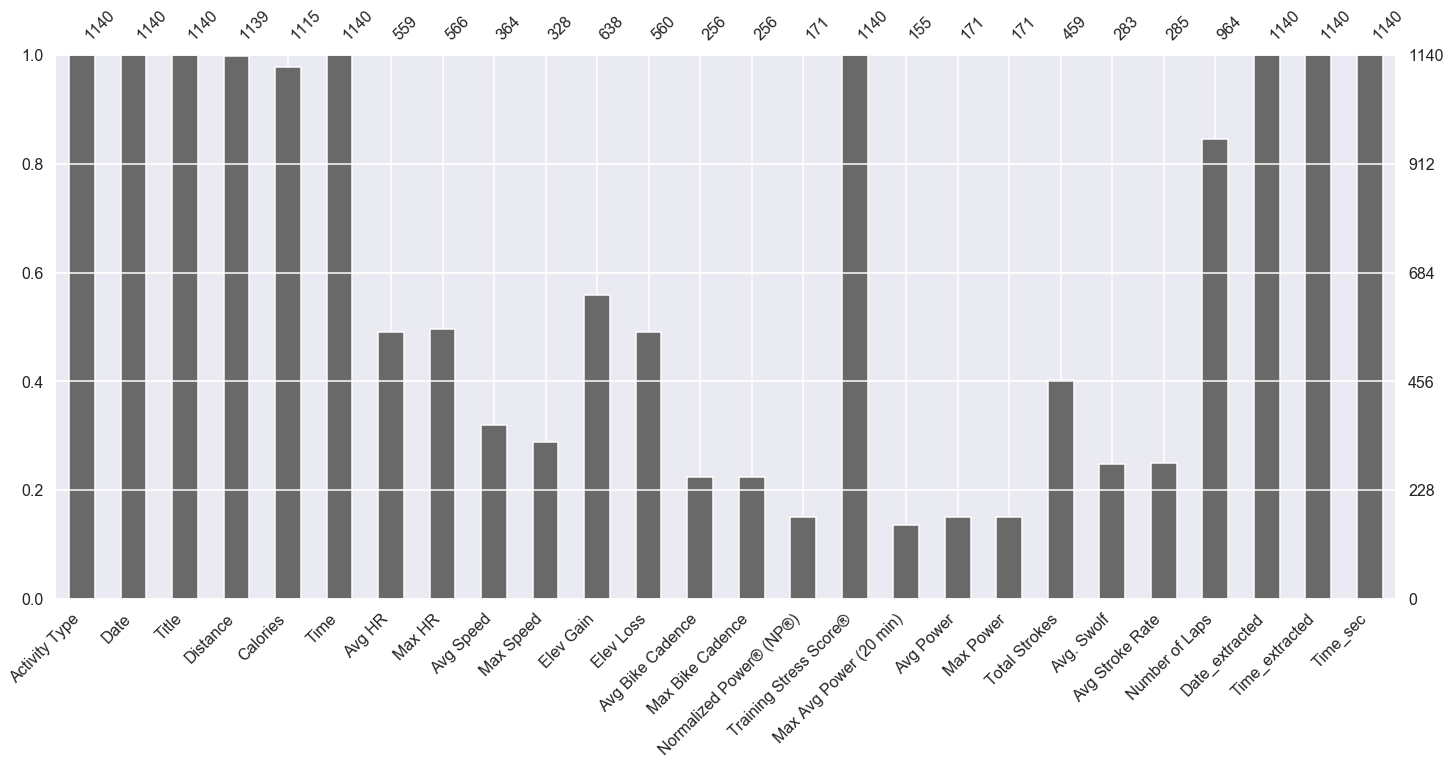

In [34]:
# In[51]:

def missingno_bar():
    graph = msno.bar(eddy)
    return graph
print(missingno_bar())
#msno.bar(eddy)

In [36]:
#def missingno_matrix():
   # matrix = msno.matrix(eddy)
    #return matrix
#print(missingno_matrix())
#msno.matrix(eddy)#for visulaising the locations of the missing data 

AxesSubplot(0.125,0.125;0.62x0.755)


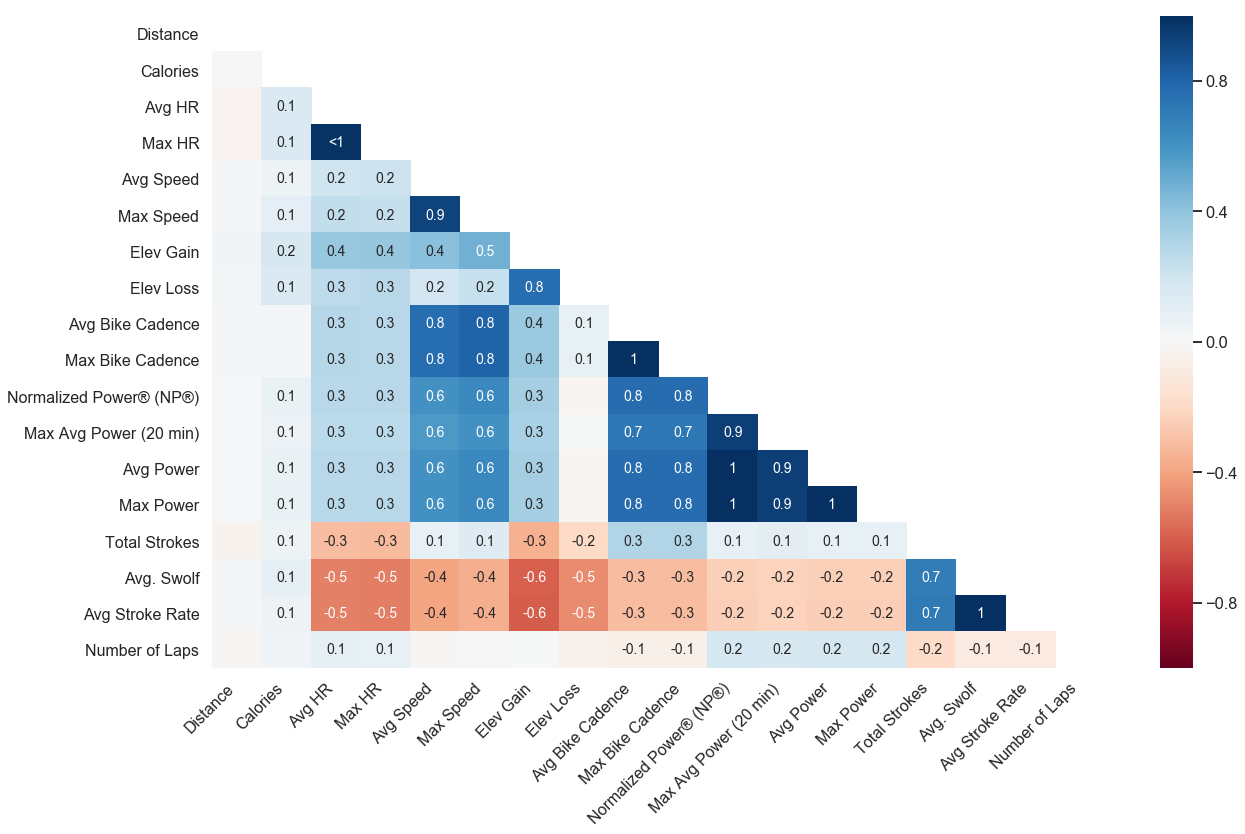

In [37]:
def heat_map():
    heatmap=msno.heatmap(eddy)
    return(heatmap)
print(heat_map())
#msno.heatmap(eddy)

AxesSubplot(0.125,0.125;0.775x0.755)


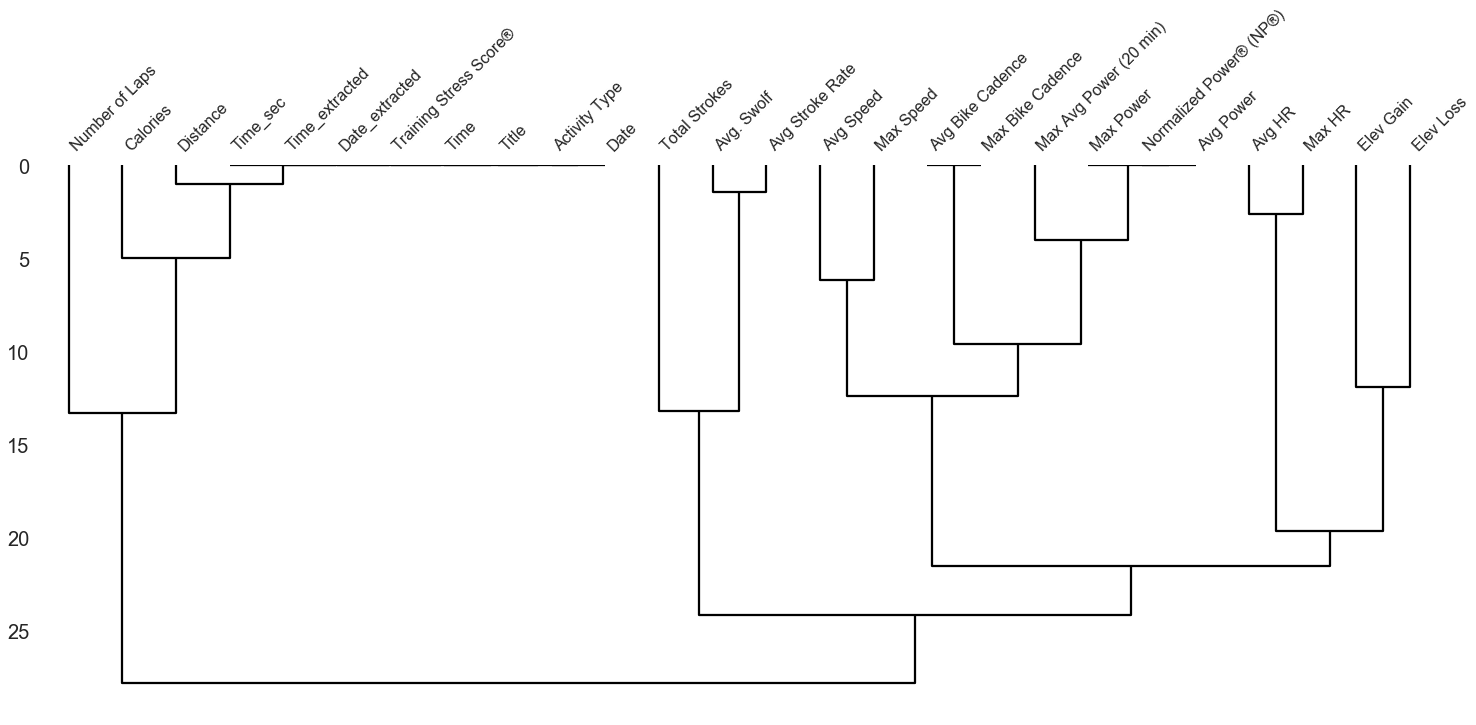

In [32]:
def deno_gram():
    dendogram = msno.dendrogram(eddy)
    return(dendogram)
print(deno_gram())
#msno.dendrogram(eddy)# for grouping highly corelated   variable

In [ ]:

pandas_profiling.ProfileReport(eddy)#not working with function


In [38]:
#mean imputation

def mean_imputation(eddy_numeric2):
    for col in eddy_numeric2.columns:
        mean = eddy_numeric2[col].mean()
        eddy_numeric2[col] = eddy_numeric2[col].fillna(mean)
    return eddy_numeric2

#eddy_numeric,numeric_cols=func_numeric()
eddy_numeric2=eddy[numeric_cols]
eddy_mean_imp = mean_imputation(eddy_numeric2)
eddy_mean_imp.head(50)

,Distance,Calories,Avg HR,Max HR,Avg Speed,Max Speed,Elev Gain,Elev Loss,Avg Bike Cadence,Max Bike Cadence,Normalized Power® (NP®),Training Stress Score®,Max Avg Power (20 min),Avg Power,Max Power,Total Strokes,Avg. Swolf,Avg Stroke Rate,Number of Laps,Time_sec
0,27.56,479.0,136.146691,165.222615,36.600000,56.500000,80.000000,164.817857,87.000000,111.000000,191.000000,0.0,197.000000,181.000000,445.000000,4174.936819,62.190813,27.308772,1.0,2714.0
1,14.08,398.0,136.146691,165.222615,23.300000,30.200000,158.619122,164.817857,89.000000,127.000000,195.000000,43.2,195.000000,183.000000,623.000000,3179.000000,62.190813,27.308772,2.0,2177.0
2,23.22,431.0,136.146691,165.222615,34.300000,54.100000,89.000000,164.817857,85.000000,111.000000,192.000000,0.0,198.000000,180.000000,620.000000,4174.936819,62.190813,27.308772,1.0,2438.0
3,50.56,838.0,136.146691,165.222615,31.500000,59.000000,158.000000,164.817857,84.000000,125.000000,167.000000,0.0,166.000000,152.000000,737.000000,4174.936819,62.190813,27.308772,1.0,5779.0
4,10.32,218.0,136.146691,165.222615,31.800000,68.100000,92.000000,164.817857,92.000000,116.000000,189.000000,0.0,174.567742,183.000000,647.000000,4174.936819,62.190813,27.308772,1.0,1168.0
5,7.77,129.0,136.146691,165.222615,32.400000,52.300000,24.000000,164.817857,84.000000,123.000000,179.000000,0.0,174.567742,157.000000,699.000000,4174.936819,62.190813,27.308772,1.0,864.0
6,8.12,191.0,136.146691,165.222615,37.900000,51.900000,37.000000,164.817857,87.000000,105.000000,234.000000,0.0,174.567742,228.000000,580.000000,4174.936819,62.190813,27.308772,1.0,771.0
7,16.77,315.0,136.146691,165.222615,37.000000,63.100000,136.000000,164.817857,84.000000,98.000000,205.000000,0.0,210.000000,200.000000,383.000000,4174.936819,62.190813,27.308772,1.0,1633.0
8,30.96,527.0,152.000000,177.000000,37.000000,56.300000,102.000000,164.817857,80.000000,100.000000,188.000000,0.0,189.000000,178.000000,420.000000,4174.936819,62.190813,27.308772,1.0,3013.0
9,8.02,468.0,146.000000,167.000000,27.778022,49.810366,40.000000,36.000000,80.796875,120.796875,173.923977,0.0,174.567742,148.894737,681.853801,4174.936819,62.190813,27.308772,9.0,2524.0


In [ ]:
#from sklearn.impute import SimpleImputer
#mean_imputation = eddy_numeric
#setting strategy to 'mean' to impute by the mean
#mean_imputer = SimpleImputer(strategy='mean')# strategy can also be mean or median 
#mean_imputation.iloc[:,:] = mean_imputer.fit_transform(mean_imputation)

In [39]:
#regression imputaion
'''Select all the numeric columns for regression imputation'''
eddy_numeric_regr = eddy[numeric_cols]
'''Numeric columns with missing values which acts as target in training'''
target_cols = ['Distance','Calories','Avg HR','Max HR','Elev Gain','Elev Loss','Avg Bike Cadence']
'''Predictors for regression imputation'''
predictors = eddy_numeric_regr.drop(target_cols, axis =1)

def find_missing_index(eddy_numeric_regr, target_cols):
  
    miss_index_dict = {}
    for tcol in target_cols:
        index = eddy_numeric_regr[tcol][eddy_numeric_regr[tcol].isnull()].index
        miss_index_dict[tcol] = index
    return miss_index_dict


def regression_imputation(eddy_numeric_regr, target_cols, miss_index_dict):
    
    for tcol in target_cols:
        y = eddy_numeric_regr[tcol]
        '''Initially impute the column with mean'''
        y = y.fillna(y.mean())
        xgb = xgboost.XGBRegressor(objective="reg:squarederror", random_state=42)
        '''Fit the model where y is the target column which is to be imputed'''
        xgb.fit(predictors, y)
        predictions = pd.Series(xgb.predict(predictors),index= y.index)    
        index = miss_index_dict[tcol]
        '''Replace the missing values with the predictions'''
        eddy_numeric_regr[tcol].loc[index] = predictions.loc[index]
    return eddy_numeric_regr

miss_index_dict = find_missing_index(eddy_numeric_regr, target_cols)
eddy_numeric_regr = regression_imputation(eddy_numeric_regr, target_cols, miss_index_dict)
eddy_numeric_regr.head(50)

,Distance,Calories,Avg HR,Max HR,Avg Speed,Max Speed,Elev Gain,Elev Loss,Avg Bike Cadence,Max Bike Cadence,Normalized Power® (NP®),Training Stress Score®,Max Avg Power (20 min),Avg Power,Max Power,Total Strokes,Avg. Swolf,Avg Stroke Rate,Number of Laps,Time_sec
0,27.56,479.0,138.027252,166.677734,36.6,56.5,80.000000,174.789108,87.000000,111.0,191.0,0.0,197.0,181.0,445.0,NaN,NaN,NaN,1.0,2714.0
1,14.08,398.0,142.026871,168.428284,23.3,30.2,103.603691,129.713486,89.000000,127.0,195.0,43.2,195.0,183.0,623.0,3179.0,NaN,NaN,2.0,2177.0
2,23.22,431.0,142.530960,173.605377,34.3,54.1,89.000000,171.989853,85.000000,111.0,192.0,0.0,198.0,180.0,620.0,NaN,NaN,NaN,1.0,2438.0
3,50.56,838.0,135.568985,174.787567,31.5,59.0,158.000000,244.408737,84.000000,125.0,167.0,0.0,166.0,152.0,737.0,NaN,NaN,NaN,1.0,5779.0
4,10.32,218.0,139.532608,171.437622,31.8,68.1,92.000000,149.043137,92.000000,116.0,189.0,0.0,NaN,183.0,647.0,NaN,NaN,NaN,1.0,1168.0
5,7.77,129.0,137.691971,167.769913,32.4,52.3,24.000000,127.447136,84.000000,123.0,179.0,0.0,NaN,157.0,699.0,NaN,NaN,NaN,1.0,864.0
6,8.12,191.0,139.438995,165.169220,37.9,51.9,37.000000,138.524612,87.000000,105.0,234.0,0.0,NaN,228.0,580.0,NaN,NaN,NaN,1.0,771.0
7,16.77,315.0,140.636642,165.199066,37.0,63.1,136.000000,164.594147,84.000000,98.0,205.0,0.0,210.0,200.0,383.0,NaN,NaN,NaN,1.0,1633.0
8,30.96,527.0,152.000000,177.000000,37.0,56.3,102.000000,174.789108,80.000000,100.0,188.0,0.0,189.0,178.0,420.0,NaN,NaN,NaN,1.0,3013.0
9,8.02,468.0,146.000000,167.000000,NaN,NaN,40.000000,36.000000,80.810928,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2524.0


In [40]:
def mode_imputation(eddy_categoric):
    """
    Mode Imputation
    """
    for col in eddy_categoric.columns:
        mode = eddy_categoric[col].mode().iloc[0]
        eddy_categoric[col] = eddy_categoric[col].fillna(mode)
    return eddy_categoric

eddy_mode_imp = mode_imputation(eddy_categoric)
'''Concatenate the mean and mode imputed columns'''
#eddy_imputed = pd.concat([eddy_mean_imp, eddy_mode_imp], axis = 1)
#eddy_imputed.head()
eddy_categoric.head()

,Activity Type,Date,Title,Time,Date_extracted,Time_extracted
0,virtual cycling,2020-04-06 18:15:01,zwift - tbr knights of suburbia (d),00:45:14,2020-04-06,18:15:01
1,indoor cycling,2020-04-05 17:00:02,indoor cycling,00:36:17,2020-04-05,17:00:02
2,virtual cycling,2020-04-05 16:00:01,zwift - ahdr bbq (d),00:40:38,2020-04-05,16:00:01
3,virtual cycling,2020-04-04 06:59:59,zwift - scott d'aucourt's meetup - tick tock,01:36:19,2020-04-04,06:59:59
4,virtual cycling,2020-04-03 18:00:28,zwift - haute route watopia stage 1 (e),00:19:28,2020-04-03,18:00:28


In [43]:
def mice_imputation_numeric(eddy_numeric):
    iter_imp_numeric = IterativeImputer(GradientBoostingRegressor())
    imputed_eddy = iter_imp_numeric.fit_transform(eddy_numeric)
    eddy_numeric_imp = pd.DataFrame(imputed_eddy, columns = eddy_numeric.columns, index= eddy_numeric.index)
    return eddy_numeric_imp
eddy_numeric_imp  = mice_imputation_numeric(eddy_numeric)


C:\Users\Spoorthi\AppData\Roaming\Python\Python37\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [44]:
eddy_numeric_imp.head(50)

,Distance,Calories,Avg HR,Max HR,Avg Speed,Max Speed,Elev Gain,Elev Loss,Avg Bike Cadence,Max Bike Cadence,Normalized Power® (NP®),Training Stress Score®,Max Avg Power (20 min),Avg Power,Max Power,Total Strokes,Avg. Swolf,Avg Stroke Rate,Number of Laps,Time_sec
0,27.56,479.0,149.963530,174.480240,36.600000,56.500000,80.000000,63.818326,87.000000,111.000000,191.000000,0.0,197.000000,181.000000,445.000000,2960.508240,132.138680,31.962284,1.0,2714.0
1,14.08,398.0,149.750049,170.838755,23.300000,30.200000,9.962020,11.638373,89.000000,127.000000,195.000000,43.2,195.000000,183.000000,623.000000,3179.000000,119.036794,20.539323,2.0,2177.0
2,23.22,431.0,150.184801,173.300790,34.300000,54.100000,89.000000,77.714031,85.000000,111.000000,192.000000,0.0,198.000000,180.000000,620.000000,2759.521378,128.342000,28.172992,1.0,2438.0
3,50.56,838.0,137.147297,177.526504,31.500000,59.000000,158.000000,157.293600,84.000000,125.000000,167.000000,0.0,166.000000,152.000000,737.000000,6156.207760,130.895218,23.695961,1.0,5779.0
4,10.32,218.0,151.429885,172.178798,31.800000,68.100000,92.000000,62.952900,92.000000,116.000000,189.000000,0.0,187.722481,183.000000,647.000000,2049.832566,118.979804,24.735058,1.0,1168.0
5,7.77,129.0,139.890536,160.076423,32.400000,52.300000,24.000000,20.534139,84.000000,123.000000,179.000000,0.0,161.168372,157.000000,699.000000,1853.213449,124.410299,24.998335,1.0,864.0
6,8.12,191.0,155.464285,175.273392,37.900000,51.900000,37.000000,27.484898,87.000000,105.000000,234.000000,0.0,225.720606,228.000000,580.000000,1969.512511,165.408232,32.125085,1.0,771.0
7,16.77,315.0,156.214415,179.536288,37.000000,63.100000,136.000000,97.751029,84.000000,98.000000,205.000000,0.0,210.000000,200.000000,383.000000,2386.742740,122.913202,31.716219,1.0,1633.0
8,30.96,527.0,152.000000,177.000000,37.000000,56.300000,102.000000,94.332248,80.000000,100.000000,188.000000,0.0,189.000000,178.000000,420.000000,3083.962766,134.864268,31.870291,1.0,3013.0
9,8.02,468.0,146.000000,167.000000,25.009947,37.470998,40.000000,36.000000,87.638286,118.855865,190.325759,0.0,198.345664,178.764361,498.284441,3766.190849,137.396491,19.977726,9.0,2524.0


In [45]:
def mice_imputation_categoric(eddy_categoric):
    ordinal_dict={}
    for col in eddy_categoric:
        ordinal_dict[col] = OrdinalEncoder()
        nn_vals = np.array(eddy_categoric[col][eddy_categoric[col].notnull()]).reshape(-1,1)
        nn_vals_arr = np.array(ordinal_dict[col].fit_transform(nn_vals)).reshape(-1,)
        eddy_categoric[col].loc[eddy_categoric[col].notnull()] = nn_vals_arr
    '''Impute the data using MICE with Gradient Boosting Classifier'''
    iter_imp_categoric = IterativeImputer(GradientBoostingClassifier(), max_iter =5, initial_strategy='most_frequent')
    imputed_eddy = iter_imp_categoric.fit_transform(eddy_categoric)
    eddy_categoric_imp = pd.DataFrame(imputed_eddy, columns =eddy_categoric.columns,index = eddy_categoric.index).astype(int)
    '''Inverse Transform'''
    for col in eddy_categoric_imp.columns:
        oe = ordinal_dict[col]
        eddy_arr= np.array(eddy_categoric_imp[col]).reshape(-1,1)
        eddy_categoric_imp[col] = oe.inverse_transform(eddy_arr)
    return eddy_categoric_imp
#eddy_categoric_imp = mice_imputation_categoric(eddy_categoric)

#'''Concatenate Numeric and Categoric Training and Test set data '''
#eddy_mice_imp = pd.join([eddy_numeric_imp, eddy_categoric_imp], axis = 1)
#eddy_mice_imp.head()

In [46]:
def Linear_interpolation(eddy_numeric):
    for col in eddy_numeric.columns:
        numeric = eddy_numeric.interpolate(method='linear', limit_direction='forward', axis=0).ffill().bfill()
    return(numeric)
eddy_Linearinterpolation = Linear_interpolation(eddy_numeric)

In [47]:
eddy_Linearinterpolation 

,Distance,Calories,Avg HR,Max HR,Avg Speed,Max Speed,Elev Gain,Elev Loss,Avg Bike Cadence,Max Bike Cadence,Normalized Power® (NP®),Training Stress Score®,Max Avg Power (20 min),Avg Power,Max Power,Total Strokes,Avg. Swolf,Avg Stroke Rate,Number of Laps,Time_sec
0,27.56,479.0,152.0,177.0,36.60,56.5,80.0,36.0,87.0,111.0,191.0,0.0,197.0,181.0,445.0,3179.000000,63.0,26.0,1.0,2714.0
1,14.08,398.0,152.0,177.0,23.30,30.2,84.5,36.0,89.0,127.0,195.0,43.2,195.0,183.0,623.0,3179.000000,63.0,26.0,2.0,2177.0
2,23.22,431.0,152.0,177.0,34.30,54.1,89.0,36.0,85.0,111.0,192.0,0.0,198.0,180.0,620.0,3433.227273,63.0,26.0,1.0,2438.0
3,50.56,838.0,152.0,177.0,31.50,59.0,158.0,36.0,84.0,125.0,167.0,0.0,166.0,152.0,737.0,3687.454545,63.0,26.0,1.0,5779.0
4,10.32,218.0,152.0,177.0,31.80,68.1,92.0,36.0,92.0,116.0,189.0,0.0,177.0,183.0,647.0,3941.681818,63.0,26.0,1.0,1168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,3.83,118.0,144.0,153.0,24.60,31.4,2.0,2.5,80.0,92.0,165.0,0.0,136.0,121.0,526.0,750.000000,51.2,23.6,1.0,559.0
1136,1.84,153.0,168.0,183.0,23.65,33.2,1.0,3.0,84.0,103.5,165.0,0.0,136.0,121.0,526.0,1308.500000,52.4,24.2,1.0,627.0
1137,8.13,198.0,125.0,147.0,22.70,35.0,2.0,2.0,88.0,115.0,165.0,0.0,136.0,121.0,526.0,1867.000000,53.6,24.8,1.0,1291.0
1138,35.83,1725.0,125.0,186.0,17.40,35.0,180.0,170.0,88.0,115.0,165.0,0.0,136.0,121.0,526.0,1075.500000,54.8,25.4,1.0,7426.0


In [43]:
#eddy=eddy_numeric
#eddy
eddy_numeric

,Distance,Calories,Avg HR,Max HR,Avg Speed,Max Speed,Elev Gain,Elev Loss,Avg Bike Cadence,Max Bike Cadence,Normalized Power® (NP®),Training Stress Score®,Max Avg Power (20 min),Avg Power,Max Power,Total Strokes,Avg. Swolf,Avg Stroke Rate,Number of Laps,Time_sec
0,27.56,479.0,NaN,NaN,36.6,56.5,80.0,NaN,87.0,111.0,191.0,0.0,197.0,181.0,445.0,NaN,NaN,NaN,1.0,2714.0
1,14.08,398.0,NaN,NaN,23.3,30.2,NaN,NaN,89.0,127.0,195.0,43.2,195.0,183.0,623.0,3179.0,NaN,NaN,2.0,2177.0
2,23.22,431.0,NaN,NaN,34.3,54.1,89.0,NaN,85.0,111.0,192.0,0.0,198.0,180.0,620.0,NaN,NaN,NaN,1.0,2438.0
3,50.56,838.0,NaN,NaN,31.5,59.0,158.0,NaN,84.0,125.0,167.0,0.0,166.0,152.0,737.0,NaN,NaN,NaN,1.0,5779.0
4,10.32,218.0,NaN,NaN,31.8,68.1,92.0,NaN,92.0,116.0,189.0,0.0,NaN,183.0,647.0,NaN,NaN,NaN,1.0,1168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,3.83,118.0,144.0,153.0,24.6,31.4,2.0,NaN,80.0,92.0,NaN,0.0,NaN,NaN,NaN,750.0,NaN,NaN,NaN,559.0
1136,1.84,153.0,168.0,183.0,NaN,NaN,1.0,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,627.0
1137,8.13,198.0,125.0,147.0,22.7,35.0,2.0,2.0,88.0,115.0,NaN,0.0,NaN,NaN,NaN,1867.0,NaN,NaN,NaN,1291.0
1138,35.83,1725.0,NaN,186.0,17.4,NaN,180.0,170.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7426.0


In [46]:
from sklearn.preprocessing import MinMaxScaler#when imputing a knn data must be normalised to reduce the bias in the imputation
scaler = MinMaxScaler()
scaling = pd.DataFrame(scaler.fit_transform(eddy_numeric), columns = numeric_cols)
eddy.head()


,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Speed,Max Speed,Elev Gain,Elev Loss,Avg Bike Cadence,Max Bike Cadence,Normalized Power® (NP®),Training Stress Score®,Max Avg Power (20 min),Avg Power,Max Power,Total Strokes,Avg. Swolf,Avg Stroke Rate,Number of Laps,Date_extracted,Time_extracted,Time_sec
0,virtual cycling,2020-04-06 18:15:01,zwift - tbr knights of suburbia (d),27.56,479.0,00:45:14,NaN,NaN,36.6,56.5,80.0,NaN,87.0,111.0,191.0,0.0,197.0,181.0,445.0,NaN,NaN,NaN,1.0,2020-04-06,18:15:01,2714.0
1,indoor cycling,2020-04-05 17:00:02,indoor cycling,14.08,398.0,00:36:17,NaN,NaN,23.3,30.2,NaN,NaN,89.0,127.0,195.0,43.2,195.0,183.0,623.0,3179.0,NaN,NaN,2.0,2020-04-05,17:00:02,2177.0
2,virtual cycling,2020-04-05 16:00:01,zwift - ahdr bbq (d),23.22,431.0,00:40:38,NaN,NaN,34.3,54.1,89.0,NaN,85.0,111.0,192.0,0.0,198.0,180.0,620.0,NaN,NaN,NaN,1.0,2020-04-05,16:00:01,2438.0
3,virtual cycling,2020-04-04 06:59:59,zwift - scott d'aucourt's meetup - tick tock,50.56,838.0,01:36:19,NaN,NaN,31.5,59.0,158.0,NaN,84.0,125.0,167.0,0.0,166.0,152.0,737.0,NaN,NaN,NaN,1.0,2020-04-04,06:59:59,5779.0
4,virtual cycling,2020-04-03 18:00:28,zwift - haute route watopia stage 1 (e),10.32,218.0,00:19:28,NaN,NaN,31.8,68.1,92.0,NaN,92.0,116.0,189.0,0.0,NaN,183.0,647.0,NaN,NaN,NaN,1.0,2020-04-03,18:00:28,1168.0


In [48]:
def knn_imputation():
    imputer = KNNImputer(n_neighbors = 23)
    imputed_KNN = pd.DataFrame(imputer.fit_transform(eddy_numeric),columns = numeric_cols)
    return imputed_KNN
knn_imputation()

,Distance,Calories,Avg HR,Max HR,Avg Speed,Max Speed,Elev Gain,Elev Loss,Avg Bike Cadence,Max Bike Cadence,Normalized Power® (NP®),Training Stress Score®,Max Avg Power (20 min),Avg Power,Max Power,Total Strokes,Avg. Swolf,Avg Stroke Rate,Number of Laps,Time_sec
0,27.56,479.0,141.478261,165.956522,36.600000,56.500000,80.000000,51.391304,87.000000,111.000000,191.000000,0.0,197.000000,181.000000,445.000000,3235.521739,55.173913,25.217391,1.000000,2714.0
1,14.08,398.0,144.391304,169.260870,23.300000,30.200000,71.086957,32.826087,89.000000,127.000000,195.000000,43.2,195.000000,183.000000,623.000000,3179.000000,45.260870,27.173913,2.000000,2177.0
2,23.22,431.0,145.652174,168.739130,34.300000,54.100000,89.000000,28.304348,85.000000,111.000000,192.000000,0.0,198.000000,180.000000,620.000000,2912.086957,61.869565,25.521739,1.000000,2438.0
3,50.56,838.0,144.217391,169.173913,31.500000,59.000000,158.000000,156.391304,84.000000,125.000000,167.000000,0.0,166.000000,152.000000,737.000000,6595.869565,65.391304,25.173913,1.000000,5779.0
4,10.32,218.0,146.043478,167.086957,31.800000,68.100000,92.000000,13.478261,92.000000,116.000000,189.000000,0.0,174.782609,183.000000,647.000000,1620.217391,60.608696,25.217391,1.000000,1168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,3.83,118.0,144.000000,153.000000,24.600000,31.400000,2.000000,4.739130,80.000000,92.000000,184.478261,0.0,177.391304,167.304348,573.391304,750.000000,60.608696,25.130435,2.260870,559.0
1136,1.84,153.0,168.000000,183.000000,25.752174,42.965217,1.000000,3.000000,82.391304,108.347826,179.956522,0.0,169.347826,163.652174,554.608696,904.913043,60.608696,25.217391,2.304348,627.0
1137,8.13,198.0,125.000000,147.000000,22.700000,35.000000,2.000000,2.000000,88.000000,115.000000,192.739130,0.0,167.173913,174.130435,622.347826,1867.000000,52.956522,26.913043,3.956522,1291.0
1138,35.83,1725.0,144.565217,186.000000,17.400000,47.004348,180.000000,170.000000,77.000000,118.043478,157.000000,0.0,162.826087,125.608696,772.695652,8286.652174,63.565217,25.434783,12.173913,7426.0


In [49]:
eddy = knn_imputation()
eddy.isna().any()

Distance                   False
Calories                   False
Avg HR                     False
Max HR                     False
Avg Speed                  False
Max Speed                  False
Elev Gain                  False
Elev Loss                  False
Avg Bike Cadence           False
Max Bike Cadence           False
Normalized Power® (NP®)    False
Training Stress Score®     False
Max Avg Power (20 min)     False
Avg Power                  False
Max Power                  False
Total Strokes              False
Avg. Swolf                 False
Avg Stroke Rate            False
Number of Laps             False
Time_sec                   False
dtype: bool

In [50]:
eddy.isna().sum()

Distance                   0
Calories                   0
Avg HR                     0
Max HR                     0
Avg Speed                  0
Max Speed                  0
Elev Gain                  0
Elev Loss                  0
Avg Bike Cadence           0
Max Bike Cadence           0
Normalized Power® (NP®)    0
Training Stress Score®     0
Max Avg Power (20 min)     0
Avg Power                  0
Max Power                  0
Total Strokes              0
Avg. Swolf                 0
Avg Stroke Rate            0
Number of Laps             0
Time_sec                   0
dtype: int64

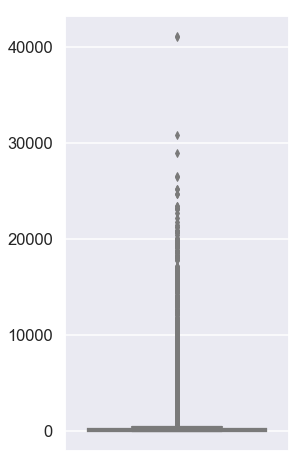

In [64]:
plt.figure(figsize = (4,8))
sns.boxplot(y = eddy)

In [51]:
def out_iqr(eddy , column):
    global lower,upper
    q25, q75 = np.quantile(eddy[column], 0.25), np.quantile(eddy[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = eddy[eddy[column] > upper]
    df2 = eddy[eddy[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [52]:
out_iqr(eddy,'Distance')

The IQR is 434.7225
The lower bound value is -644.80625
The upper bound value is 1094.08375
Total number of outliers are 261


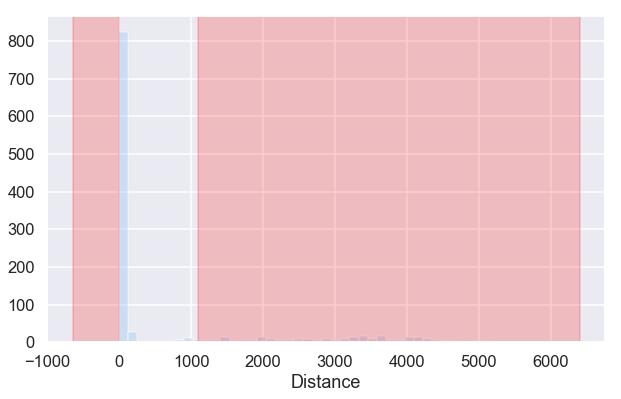

In [53]:
plt.figure(figsize = (10,6))
sns.distplot(eddy.Distance, kde=False)
plt.axvspan(xmin = lower,xmax= eddy.Distance.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= eddy.Distance.max(),alpha=0.2, color='red')

In [ ]:
#Data Frame without outliers
#df_new = eddy[(eddy['Distance'] < upper) | (eddy['Distance'] > lower)]

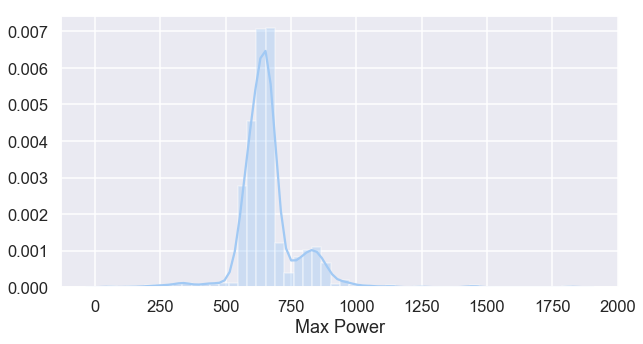

In [54]:
plt.figure(figsize = (10,5))
sns.distplot(eddy['Max Power'])

In [56]:
def out_std(eddy, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = eddy[column].mean(), eddy[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = eddy[eddy[column] > upper]
    df2 = eddy[eddy[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])


In [57]:
out_std(eddy,'Max Power')

The lower bound value is 317.23750802226687
The upper bound value is 1006.5489145559156
Total number of outliers are 18


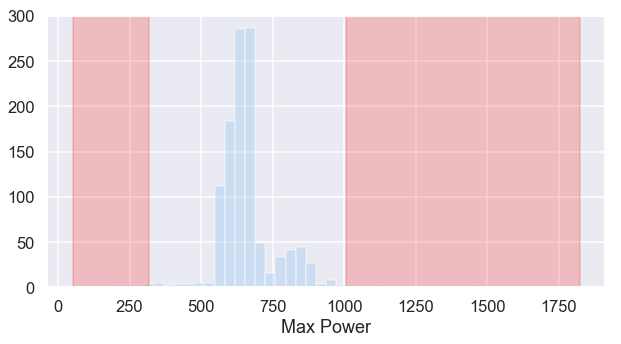

In [58]:
plt.figure(figsize = (10,5))
sns.distplot(eddy['Max Power'], kde=False)
plt.axvspan(xmin = lower,xmax= eddy['Max Power'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= eddy['Max Power'].max(),alpha=0.2, color='red')

In [ ]:
#Data Frame without outliers
#df_new = eddy[(eddy['Max Power'] < upper) | (eddy['Max Power'] > lower)]

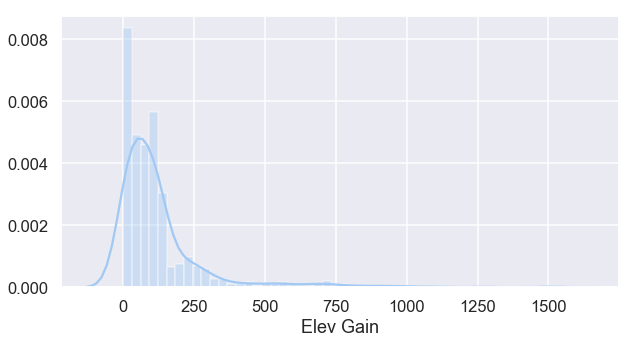

In [59]:
#Zscore
plt.figure(figsize = (10,5))
sns.distplot(eddy['Elev Gain'])

In [60]:
def out_zscore(eddy):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(eddy)
    std = np.std(eddy)
    for i in eddy:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

In [62]:
out_zscore(eddy['Elev Gain'])

Total number of outliers are 35


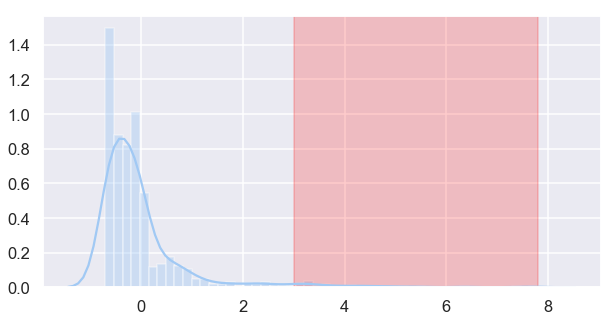

In [63]:
plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

In [ ]:
#df_new = eddy[(eddy['Calories'] < 3) | (eddy['Calories'] > -3)]

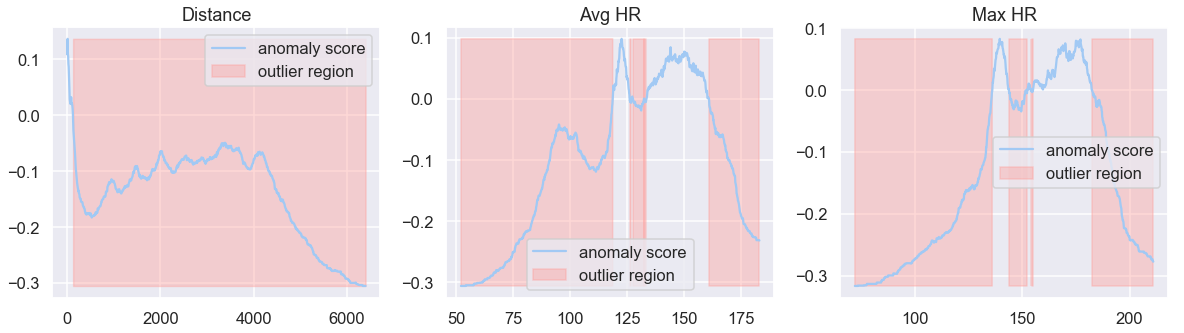

In [64]:
#if
#Import necessary libraries
from sklearn.ensemble import IsolationForest
#The required columns
cols = ['Distance','Avg HR', 'Max HR']
#Plotting the sub plot
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(eddy[column].values.reshape(-1,1))

    xx = np.linspace(eddy[column].min(), eddy[column].max(), len(eddy)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

In [65]:
#DB scan
X = eddy[['Distance','Max HR']].values

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

In [66]:
pd.Series(labels).value_counts()#-1 represents outliers

-1    546
 0    500
 1     26
 3     24
 5     18
 2     14
 6      6
 4      6
dtype: int64

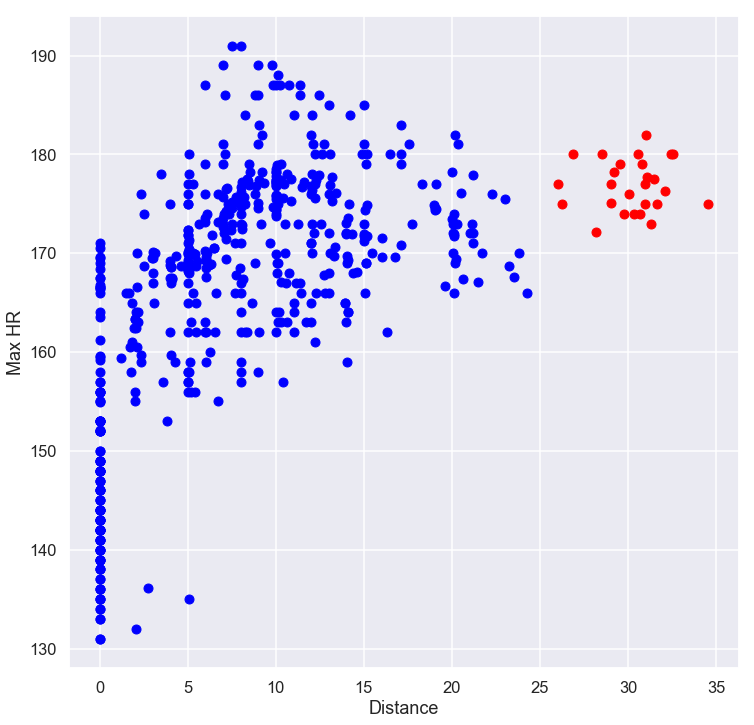

In [67]:
plt.figure(figsize=(12,12))#red outliers

unique_labels = set(labels)
colors = ['blue', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.xlabel('Distance');
plt.ylabel('Max HR');

In [69]:
#lofLocal Outlier Factor Method
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = eddy[['Avg Speed','Max Speed']].values
y_pred = clf.fit_predict(X)



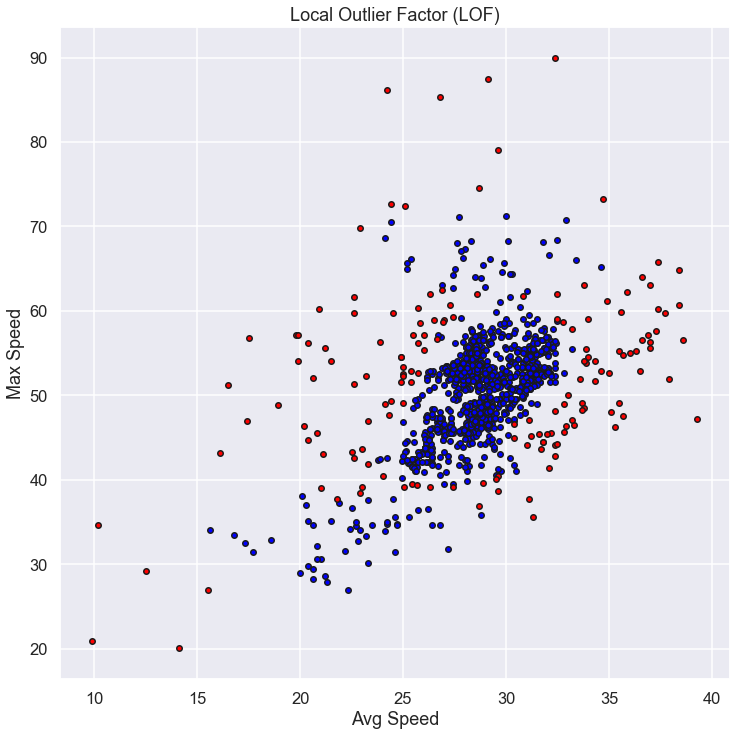

In [70]:
plt.figure(figsize=(12,12))#red outliers ,blue nrml records
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Avg Speed');
plt.ylabel('Max Speed');
plt.show()
